Simple example to generate AWGN

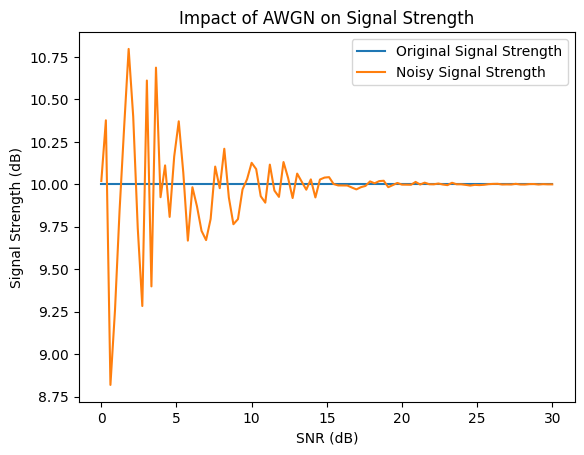

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of SNR values
snr_db = np.linspace(0, 30, 100)  # SNR in dB

# Convert SNR to linear scale
snr_linear = np.power(10, snr_db/10)

# Generate random Gaussian noise for each SNR value
noise = np.random.normal(0, 1/snr_linear, size=snr_linear.shape)

# Calculate noisy signal strength (assuming constant signal strength of 10)
noisy_signal_strength = 10 + noise

# Plot the original signal strength and noisy signal strength vs SNR
plt.plot(snr_db, np.ones_like(snr_db)*10, label="Original Signal Strength")
plt.plot(snr_db, noisy_signal_strength, label="Noisy Signal Strength")

# Configure plot labels and title
plt.xlabel("SNR (dB)")
plt.ylabel("Signal Strength (dB)")
plt.title("Impact of AWGN on Signal Strength")
plt.legend()

# Show the plot
plt.grid(False)
plt.show()


Generate AWGN for user demand and supply, **simulating the scenario between two users. User A with strong signal but noisy channel while User B with weak signal but a good channel. Prioritize User A for smaller aggregations in the network to achieve fairness compared to B.** Plot the distribution as a bell-shaped curve.

User Signal Strength (Demand): [10, 5]
User Channel SNR (Supply): [15.757879279046996, 16.656680236146553]
Demand-Supply Ratio (DSR): [0.6346031609276791, 0.30017986352103543]
Aggregation size may be adjusted based on other factors


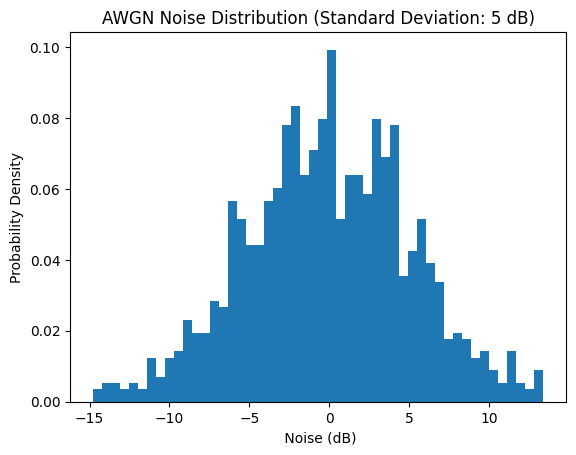

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define user signal strengths (demand)
user_signal_strength = [10, 5]  # User A (high), User B (low)

# Set baseline channel SNR (supply)
baseline_snr = 20  # dB

# Define AWGN standard deviation (representing channel noise variations)
awgn_std = 5  # dB

# Simulate AWGN for each user's channel
user_snr = [baseline_snr + np.random.normal(0, awgn_std) for _ in user_signal_strength]

# Print user information
print("User Signal Strength (Demand):", user_signal_strength)
print("User Channel SNR (Supply):", user_snr)

# Calculate Demand-Supply Ratio (DSR)
dsr = [strength / snr for strength, snr in zip(user_signal_strength, user_snr)]

# Print DSR
print("Demand-Supply Ratio (DSR):", dsr)

# Simulate prioritizing User A with lower DSR for smaller aggregations
# (This would be implemented in the network logic)
if dsr[0] < dsr[1]:
    print("Prioritize User A for smaller aggregations due to lower DSR")
else:
    print("Aggregation size may be adjusted based on other factors")

# Generate AWGN noise distribution for visualization (1000 samples)
num_samples = 1000
noise = np.random.normal(0, awgn_std, num_samples)

# Plot the AWGN noise distribution
plt.hist(noise, bins=50, density=True)
plt.xlabel(" Noise (dB)")
plt.ylabel("Probability Density")
plt.title("AWGN Noise Distribution (Standard Deviation: {} dB)".format(awgn_std))
plt.grid(False)
plt.show()


Scenario for **multiple users**

User Signal Strength (Demand): [12.38399746 12.46773315 14.44302841 10.51299487 10.86405194]
User Channel SNR (Supply): [13.768801137799336, 18.260381503608773, 26.367551964047717, 24.34354694785053, 25.22911548555347]
Demand-Supply Ratio (DSR): [0.9  0.68 0.55 0.43 0.43]
Prioritization based on DSR (lower DSR = higher priority):
User 5 (DSR: 0.43)
User 4 (DSR: 0.43)
User 3 (DSR: 0.55)
User 2 (DSR: 0.68)
User 1 (DSR: 0.90)


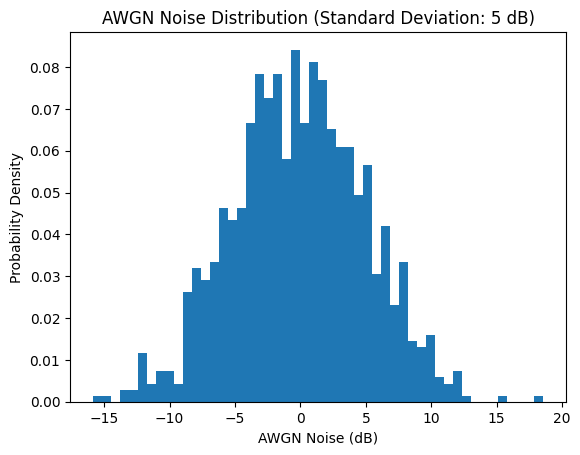

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define number of users
num_users = 5

# Define baseline signal strengths and standard deviation for variation
baseline_signal_strength = 10  # (arbitrary units)
signal_strength_std = 2

# Define baseline channel SNR and standard deviation for variation
baseline_snr = 20  # dB
awgn_std = 5  # dB

# Simulate user signal strengths (demand) with variations
user_signal_strength = np.random.normal(baseline_signal_strength, signal_strength_std, num_users)

# Simulate user channel SNR (supply) with variations due to AWGN
user_snr = [baseline_snr + np.random.normal(0, awgn_std) for _ in range(num_users)]

# Print user information
print("User Signal Strength (Demand):", user_signal_strength)
print("User Channel SNR (Supply):", user_snr)

# Calculate Demand-Supply Ratio (DSR)
dsr = user_signal_strength / user_snr

# Print DSR
print("Demand-Supply Ratio (DSR):", dsr.round(2))  # Round DSR for better readability

# Print prioritization based on DSR
user_priority = np.argsort(dsr)  # Sort users based on ascending DSR (lower DSR = higher priority)
print("Prioritization based on DSR (lower DSR = higher priority):")
for i, user in enumerate(user_priority):
    print(f"User {user+1} (DSR: {dsr[user]:.2f})")

# Generate AWGN noise distribution for visualization (1000 samples)
num_samples = 1000
noise = np.random.normal(0, awgn_std, num_samples)

# Plot the AWGN noise distribution
plt.hist(noise, bins=50, density=True)
plt.xlabel("AWGN Noise (dB)")
plt.ylabel("Probability Density")
plt.title("AWGN Noise Distribution (Standard Deviation: {} dB)".format(awgn_std))
plt.grid(False)
plt.show()


Same scenario incorporating **weighting factors based on context** alongside DSR

User Information:
  - User 1:
      Signal Strength: 8
      Application: Video call (high priority)
      Weight: 3
      DSR: 0.38
      Weighted DSR: 1.15
  - User 2:
      Signal Strength: 12
      Application: File transfer (low priority)
      Weight: 1
      DSR: 0.48
      Weighted DSR: 0.48
  - User 3:
      Signal Strength: 5
      Application: Video call (high priority)
      Weight: 3
      DSR: 0.33
      Weighted DSR: 0.99
  - User 4:
      Signal Strength: 7
      Application: Web browsing (medium priority)
      Weight: 2
      DSR: 0.32
      Weighted DSR: 0.64

Prioritization based on Weighted DSR (descending):
  - User 1 (Weighted DSR: 1.15)
  - User 3 (Weighted DSR: 0.99)
  - User 4 (Weighted DSR: 0.64)
  - User 2 (Weighted DSR: 0.48)


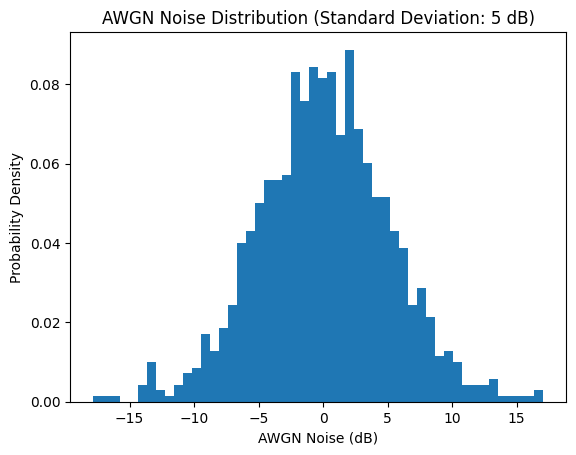

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define user information
num_users = 4
user_data = [
    {"signal_strength": 8, "application_type": "Video call (high priority)", "weight": 3},  # High demand, high weight
    {"signal_strength": 12, "application_type": "File transfer (low priority)", "weight": 1},  # High demand, low weight
    {"signal_strength": 5, "application_type": "Video call (high priority)", "weight": 3},  # Low demand, high weight
    {"signal_strength": 7, "application_type": "Web browsing (medium priority)", "weight": 2},  # Medium demand, medium weight
]

# Define baseline channel SNR and standard deviation for variation
baseline_snr = 20  # dB
awgn_std = 5  # dB

# Simulate user channel SNR (supply) with variations due to AWGN
user_snr = [baseline_snr + np.random.normal(0, awgn_std) for _ in range(num_users)]

# Calculate Demand-Supply Ratio (DSR)
dsr = [user["signal_strength"] / snr for user, snr in zip(user_data, user_snr)]

# Calculate weighted DSR (considering application type priority)
weighted_dsr = [dsr[i] * user_data[i]["weight"] for i in range(num_users)]

# Print user information, DSR, and weighted DSR
print("User Information:")
for i, user in enumerate(user_data):
    print(f"  - User {i+1}:")
    print(f"      Signal Strength: {user['signal_strength']}")
    print(f"      Application: {user['application_type']}")
    print(f"      Weight: {user['weight']}")
    print(f"      DSR: {dsr[i]:.2f}")
    print(f"      Weighted DSR: {weighted_dsr[i]:.2f}")

# Sort users based on descending weighted DSR (higher value = higher priority)
user_priority = np.argsort(weighted_dsr)[::-1]  # Reverse sort for descending order

# Print prioritization based on weighted DSR
print("\nPrioritization based on Weighted DSR (descending):")
for i, user in enumerate(user_priority):
    print(f"  - User {user+1} (Weighted DSR: {weighted_dsr[user]:.2f})")

# Generate AWGN noise distribution for visualization (1000 samples)
num_samples = 1000
noise = np.random.normal(0, awgn_std, num_samples)

# Plot the AWGN noise distribution
plt.hist(noise, bins=50, density=True)
plt.xlabel("AWGN Noise (dB)")
plt.ylabel("Probability Density")
plt.title("AWGN Noise Distribution (Standard Deviation: {} dB)".format(awgn_std))
plt.grid(False)
plt.show()
